# Notebook 1: Probability Foundations

## 1. Introduction to Probability

### What is Probability?

Probability is a way to measure uncertainty. It helps us quantify:
- How likely events are to occur
- How to make decisions when outcomes are uncertain
- How to update our beliefs when we get new information

Think of probability as a number between 0 and 1 (or 0% and 100%) that tells us how likely something is to happen:
- A probability of 0 means an event is impossible
- A probability of 1 means an event is certain
- A probability of 0.5 means an event has a 50% chance of happening

### Why Does Probability Matter?

Probability shows up in our everyday lives:
- Weather forecasts ("60% chance of rain")
- Sports predictions ("70% chance of winning")
- Medical diagnoses ("5% risk of side effects")

It's also crucial for machine learning because:
- Data is inherently noisy and uncertain
- We need to make predictions about unseen cases
- We want to know how confident we should be in our predictions

### Let's Start with a Simple Example: Coin Flips

The humble coin flip is the perfect place to start understanding probability. When you flip a fair coin:
- The probability of getting heads is 0.5 (50%)
- The probability of getting tails is 0.5 (50%)

Let's see what happens when we simulate coin flips in Python:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed so we get the same results each time
np.random.seed(42)

# Flip a coin once (0 = tails, 1 = heads)
single_flip = np.random.randint(0, 2)
print(f"One coin flip result: {'Heads' if single_flip == 1 else 'Tails'}")

One coin flip result: Tails


In [15]:
# Now flip a coin 10 times
ten_flips = np.random.randint(0, 2, size=10)
print(f"Ten coin flips: {['H' if flip == 1 else 'T' for flip in ten_flips]}")
print(f"Number of heads: {np.sum(ten_flips)}")
print(f"Proportion of heads: {np.sum(ten_flips)/10:.2f}")

Ten coin flips: ['H', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T']
Number of heads: 3
Proportion of heads: 0.30


> 🤔 **Think About It**: If you get 7 heads in 10 flips, does that mean the coin is unfair? Or is this just a normal variation of a fair coin?

### Theoretical vs. Empirical Probability and the Law of Large Numbers

#### Definitions

##### Theoretical Probability
Theoretical probability (also called classical probability) is the mathematically expected probability of an event based on the structure of the random process, calculated before any experiments are conducted.

**Formula:**
$$P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}$$

Where:
- $P(A)$ is the probability of event A occurring
- All outcomes are assumed to be equally likely

##### Empirical Probability
Empirical probability (also called experimental or relative frequency probability) is based on actual observed results from experiments or data collection.

**Formula:**
$$P(A) = \frac{\text{Number of times event A occurred}}{\text{Total number of trials conducted}}$$

##### __Key Differences Between Theoretical and Empirical Probability__

| Theoretical Probability | Empirical Probability |
|-------------------------|------------------------|
| Based on mathematical reasoning | Based on experimental results |
| Calculated before conducting trials | Calculated after conducting trials |
| Remains constant regardless of trials | May vary from one set of trials to another |
| Uses the structure of the random process | Uses observed frequencies |
| Often represents the "true" probability  | Approximates the true probability |
| Example: P(heads) = 0.5 for a fair coin  | Example: If 48 heads in 100 flips, P(heads) = 0.48 |

### The Law of Large Numbers

The Law of Large Numbers is a fundamental theorem in probability theory that describes the relationship between theoretical and empirical probability. It states that as the number of trials increases, the empirical probability converges to the theoretical probability.

Let's try flipping more coins to see if we get closer to the expected 50% heads:

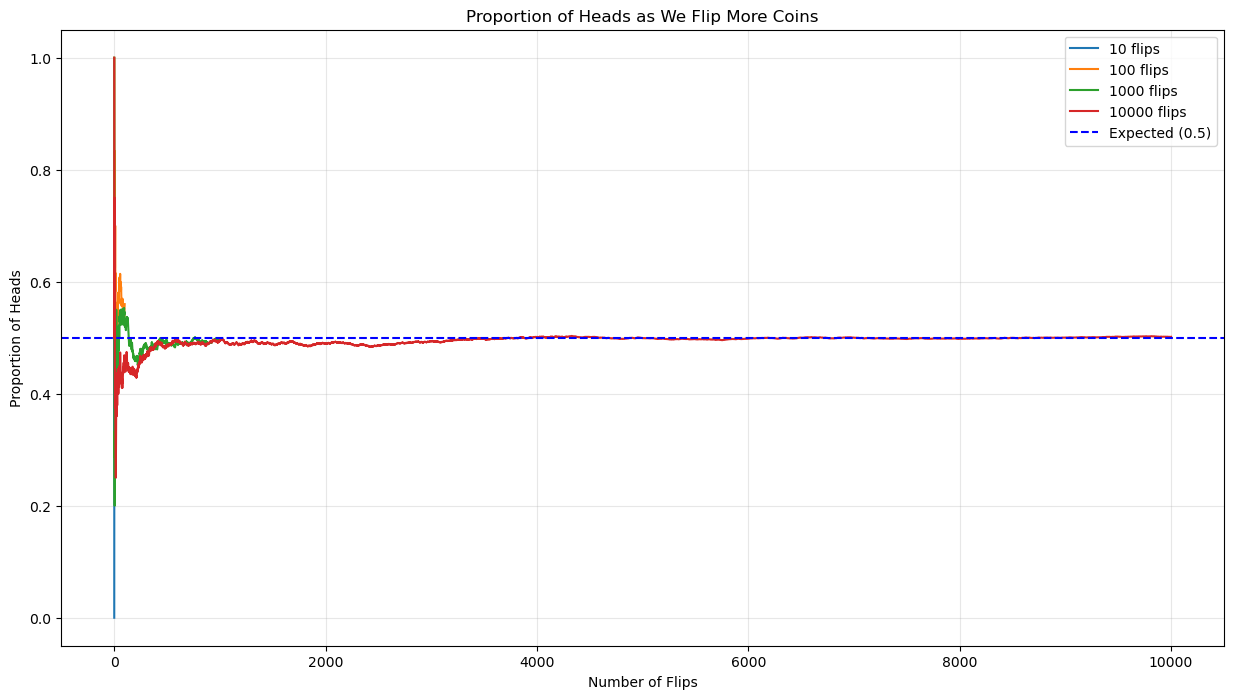

In [24]:
# Let's flip more coins and track the results
num_flips = [10, 100, 1000, 10000]
results = {}

plt.figure(figsize=(15, 8))

for i, flips in enumerate(num_flips):
    # Simulate coin flips
    coin_flips = np.random.randint(0, 2, size=flips)
    
    # Calculate the running proportion of heads
    heads_count = np.cumsum(coin_flips)
    flip_numbers = np.arange(1, flips + 1)
    heads_proportion = heads_count / flip_numbers
    
    # Store the final proportion
    results[flips] = heads_proportion[-1]
    
    # Plot the results
    plt.plot(flip_numbers, heads_proportion, label=f'{flips} flips')

# Add reference line at 0.5
plt.axhline(y=0.5, color='b', linestyle='--', label='Expected (0.5)')

plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('Proportion of Heads as We Flip More Coins')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
# Print the final proportions
for flips, proportion in results.items():
    print(f"After {flips} flips: {proportion:.4f}")

After 10 flips: 0.4000
After 100 flips: 0.5600
After 1000 flips: 0.4960
After 10000 flips: 0.5016


Do you notice how the proportion of heads gets closer to 0.5 as we flip more coins? This is called the **Law of Large Numbers**: as we increase our sample size, the empirical (observed) probability approaches the theoretical probability.

> 💡 **Key Insight**: With small samples (like 10 flips), we often see big deviations from the expected probability. This is normal! As we collect more data, these random fluctuations tend to even out.

## 2. Basic Probability Concepts

Now that we have some intuition about probability, let's formalize a few key concepts.

### Experiments, Sample Spaces, and Events

Every probability problem involves three key components:

1. **Experiment**: Any process with an uncertain outcome
   - Examples: flipping a coin, rolling a die, measuring tomorrow's temperature

2. **Sample Space (S)**: The set of all possible outcomes from the experiment
   - For a coin flip: S = {Heads, Tails}
   - For a die roll: S = {1, 2, 3, 4, 5, 6}

3. **Event**: A subset of the sample space that we're interested in
   - Example: "rolling an even number" = {2, 4, 6}

Let's use the example of rolling a standard six-sided die:

In [27]:
# Define the sample space for a die roll
sample_space_die = [1, 2, 3, 4, 5, 6]

# Define some events
event_even = [2, 4, 6]  # Rolling an even number
event_greater_than_four = [5, 6]  # Rolling greater than 4
event_prime = [2, 3, 5]  # Rolling a prime number

# Display the events
print(f"Sample Space: {sample_space_die}")
print(f"Event 'Even Number': {event_even}")
print(f"Event 'Greater Than 4': {event_greater_than_four}")
print(f"Event 'Prime Number': {event_prime}")

Sample Space: [1, 2, 3, 4, 5, 6]
Event 'Even Number': [2, 4, 6]
Event 'Greater Than 4': [5, 6]
Event 'Prime Number': [2, 3, 5]



### Calculating Probability

For equally likely outcomes, the probability of an event is:

$$P(Event) = \frac{Number~of~favorable~outcomes}{Total~number~of~possible~outcomes}$$

Let's calculate the probabilities for our die events:



In [6]:
# Calculate probabilities
prob_even = len(event_even) / len(sample_space_die)
prob_greater_than_four = len(event_greater_than_four) / len(sample_space_die)
prob_prime = len(event_prime) / len(sample_space_die)

print(f"P(Even) = {prob_even:.3f} = {prob_even*100:.0f}%")
print(f"P(Greater Than 4) = {prob_greater_than_four:.3f} = {prob_greater_than_four*100:.0f}%")
print(f"P(Prime) = {prob_prime:.3f} = {prob_prime*100:.0f}%")

P(Even) = 0.500 = 50%
P(Greater Than 4) = 0.333 = 33%
P(Prime) = 0.500 = 50%



### Simulating Die Rolls

Let's simulate rolling a die many times to see if our empirical probabilities match the theoretical ones:



In [7]:
# Simulate 1000 die rolls
num_rolls = 1000
die_rolls = np.random.choice(sample_space_die, size=num_rolls)

# Count the occurrences of each event
count_even = sum(roll in event_even for roll in die_rolls)
count_greater_than_four = sum(roll in event_greater_than_four for roll in die_rolls)
count_prime = sum(roll in event_prime for roll in die_rolls)

# Calculate empirical probabilities
empirical_prob_even = count_even / num_rolls
empirical_prob_greater_than_four = count_greater_than_four / num_rolls
empirical_prob_prime = count_prime / num_rolls

print("Empirical probabilities after 1000 rolls:")
print(f"P(Even) = {empirical_prob_even:.3f}")
print(f"P(Greater Than 4) = {empirical_prob_greater_than_four:.3f}")
print(f"P(Prime) = {empirical_prob_prime:.3f}")

Empirical probabilities after 1000 rolls:
P(Even) = 0.507
P(Greater Than 4) = 0.323
P(Prime) = 0.532


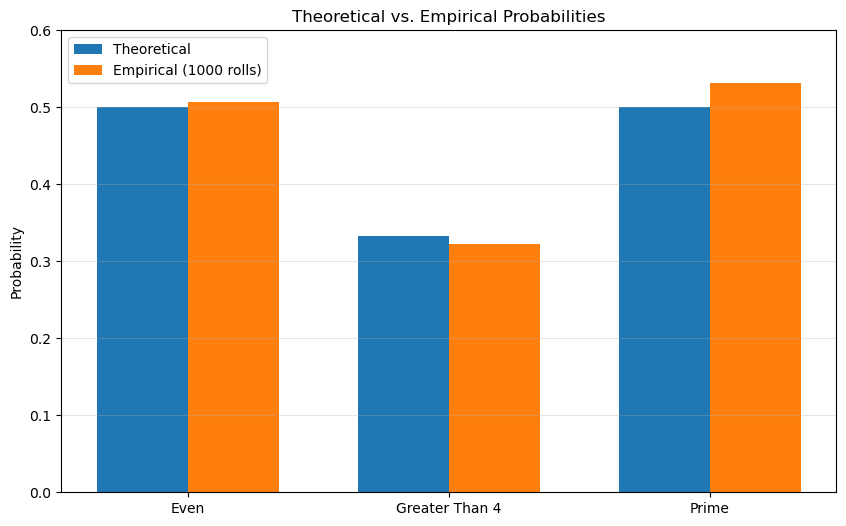

In [8]:
# Visualize the comparison
events = ['Even', 'Greater Than 4', 'Prime']
theoretical_probs = [prob_even, prob_greater_than_four, prob_prime]
empirical_probs = [empirical_prob_even, empirical_prob_greater_than_four, empirical_prob_prime]

plt.figure(figsize=(10, 6))
x = np.arange(len(events))
width = 0.35

plt.bar(x - width/2, theoretical_probs, width, label='Theoretical')
plt.bar(x + width/2, empirical_probs, width, label='Empirical (1000 rolls)')

plt.ylabel('Probability')
plt.title('Theoretical vs. Empirical Probabilities')
plt.xticks(x, events)
plt.ylim(0, 0.6)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()


> 🔍 **Observation**: Notice how the empirical probabilities are close to the theoretical ones, but not exactly the same? That's normal sampling variation!

### Basic Probability Rules

Here are three fundamental rules of probability:

1. **Non-negativity**: For any event A, P(A) ≥ 0
   - Probabilities can't be negative

2. **Normalization**: P(S) = 1
   - The probability of the entire sample space equals 1 (something must happen)

3. **Additivity**: For mutually exclusive events A and B, P(A ∪ B) = P(A) + P(B)
   - If events cannot occur simultaneously, the probability of either occurring is the sum of their individual probabilities

Let's see an example of the additivity rule with our die:



In [9]:
# Mutually exclusive events: can't happen at the same time
event_one = [1]  # Rolling a 1
event_six = [6]  # Rolling a 6

# Calculate probabilities
p_one = len(event_one) / len(sample_space_die)
p_six = len(event_six) / len(sample_space_die)
p_one_or_six = (len(event_one) + len(event_six)) / len(sample_space_die)

print(f"P(One) = {p_one}")
print(f"P(Six) = {p_six}")
print(f"P(One OR Six) = {p_one_or_six}")
print(f"P(One) + P(Six) = {p_one + p_six}")

P(One) = 0.16666666666666666
P(Six) = 0.16666666666666666
P(One OR Six) = 0.3333333333333333
P(One) + P(Six) = 0.3333333333333333



What about events that are not mutually exclusive? Let's look at "even numbers" and "numbers greater than 3":



In [10]:
# Non-mutually exclusive events
event_even = [2, 4, 6]  # Even numbers
event_greater_than_three = [4, 5, 6]  # Numbers greater than 3

# Identify the overlap (intersection)
event_intersection = [4, 6]  # Numbers that are both even AND greater than 3

# Calculate probabilities
p_even = len(event_even) / len(sample_space_die)
p_greater_than_three = len(event_greater_than_three) / len(sample_space_die)
p_intersection = len(event_intersection) / len(sample_space_die)

# For non-mutually exclusive events, we need to subtract the intersection
p_even_or_greater_than_three = p_even + p_greater_than_three - p_intersection

print(f"P(Even) = {p_even}")
print(f"P(Greater Than 3) = {p_greater_than_three}")
print(f"P(Even AND Greater Than 3) = {p_intersection}")
print(f"P(Even OR Greater Than 3) = {p_even_or_greater_than_three}")
print(f"P(Even) + P(Greater Than 3) - P(Even AND Greater Than 3) = {p_even + p_greater_than_three - p_intersection}")

P(Even) = 0.5
P(Greater Than 3) = 0.5
P(Even AND Greater Than 3) = 0.3333333333333333
P(Even OR Greater Than 3) = 0.6666666666666667
P(Even) + P(Greater Than 3) - P(Even AND Greater Than 3) = 0.6666666666666667



This gives us the **General Addition Rule**:
$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

Where:
- $P(A \cup B)$ means the probability of either A OR B happening
- $P(A \cap B)$ means the probability of both A AND B happening

### Complement Rule

Another useful rule is the **Complement Rule**:
$$P(A') = 1 - P(A)$$

Where $A'$ is the complement of event $A$ (everything in the sample space that is not in $A$).

For example, the probability of NOT rolling a 6:



In [28]:
# Calculate the probability of rolling a 6
p_six = 1 / 6

# Calculate the probability of NOT rolling a 6 using the complement rule
p_not_six = 1 - p_six

print(f"P(Six) = {p_six}")
print(f"P(Not Six) = {p_not_six}")
print(f"P(Not Six) calculated directly = {5/6}")

P(Six) = 0.16666666666666666
P(Not Six) = 0.8333333333333334
P(Not Six) calculated directly = 0.8333333333333334


## 3. Practice Exercises

Let's solidify our understanding with some exercises.

### Exercise 1: Basic Probability Calculation

A bag contains 5 red marbles, 3 blue marbles, and 2 green marbles. If you draw one marble at random, calculate:
a) The probability of drawing a red marble
b) The probability of drawing a blue or green marble
c) The probability of NOT drawing a red marble

In [13]:
# Define the marbles in the bag
bag = {'red': 5, 'blue': 3, 'green': 2}
total_marbles = sum(bag.values())

# a) Probability of drawing a red marble
p_red = bag['red'] / total_marbles
print(f"a) P(Red) = {bag['red']}/{total_marbles} = {p_red:.3f}")

# b) Probability of drawing a blue or green marble
p_blue_or_green = (bag['blue'] + bag['green']) / total_marbles
print(f"b) P(Blue or Green) = ({bag['blue']} + {bag['green']})/{total_marbles} = {p_blue_or_green:.3f}")

# c) Probability of NOT drawing a red marble
p_not_red = 1 - p_red
print(f"c) P(Not Red) = 1 - {p_red:.3f} = {p_not_red:.3f}")

a) P(Red) = 5/10 = 0.500
b) P(Blue or Green) = (3 + 2)/10 = 0.500
c) P(Not Red) = 1 - 0.500 = 0.500



### Exercise 2: Playing Cards

A standard deck of playing cards has 52 cards, with:
- 4 suits (hearts, diamonds, clubs, spades)
- 13 ranks in each suit (Ace, 2-10, Jack, Queen, King)
- Hearts and diamonds are red; clubs and spades are black

If you draw one card at random, what is the probability of:
a) Drawing an ace
b) Drawing a heart
c) Drawing a red card or a face card (Jack, Queen, King)



In [30]:
# Set up the card structure
total_cards = 52
suits = ['hearts', 'diamonds', 'clubs', 'spades']
ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

# Count various card types
num_aces = 4  # One ace in each suit
num_hearts = 13  # 13 hearts in a deck
num_red_cards = 26  # Hearts and diamonds
num_face_cards = 12  # Jack, Queen, King in each suit
num_red_face_cards = 6  # Face cards that are also red

# a) Probability of drawing an ace
p_ace = num_aces / total_cards
print(f"a) P(Ace) = {num_aces}/{total_cards} = {p_ace:.3f}")

# b) Probability of drawing a heart
p_heart = num_hearts / total_cards
print(f"b) P(Heart) = {num_hearts}/{total_cards} = {p_heart:.3f}")

# c) Probability of drawing a red card or a face card
# We need to use the general addition rule here
p_red = num_red_cards / total_cards
p_face = num_face_cards / total_cards
p_red_and_face = num_red_face_cards / total_cards
p_red_or_face = p_red + p_face - p_red_and_face

print(f"c) P(Red or Face) = P(Red) + P(Face) - P(Red and Face)")
print(f"   = {p_red:.3f} + {p_face:.3f} - {p_red_and_face:.3f} = {p_red_or_face:.3f}")


a) P(Ace) = 4/52 = 0.077
b) P(Heart) = 13/52 = 0.250
c) P(Red or Face) = P(Red) + P(Face) - P(Red and Face)
   = 0.500 + 0.231 - 0.115 = 0.615



### Exercise 3: Simulation

Let's simulate drawing cards from a deck to verify our calculated probabilities:



In [31]:
# Create a standard deck of cards
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
deck = [(rank, suit) for suit in suits for rank in ranks]

# Define card characteristics
def is_ace(card):
    return card[0] == 'Ace'

def is_heart(card):
    return card[1] == 'Hearts'

def is_red(card):
    return card[1] in ['Hearts', 'Diamonds']

def is_face_card(card):
    return card[0] in ['Jack', 'Queen', 'King']

# Simulate drawing many cards with replacement
num_simulations = 10000
np.random.seed(42)  # For reproducibility

# Draw cards
draws = [deck[np.random.randint(0, 52)] for _ in range(num_simulations)]

# Count occurrences
count_aces = sum(is_ace(card) for card in draws)
count_hearts = sum(is_heart(card) for card in draws)
count_red = sum(is_red(card) for card in draws)
count_face = sum(is_face_card(card) for card in draws)
count_red_and_face = sum(is_red(card) and is_face_card(card) for card in draws)

# Calculate empirical probabilities
empirical_p_ace = count_aces / num_simulations
empirical_p_heart = count_hearts / num_simulations
empirical_p_red_or_face = (count_red + count_face - count_red_and_face) / num_simulations

print(f"Empirical probabilities after {num_simulations} simulations:")
print(f"P(Ace) = {empirical_p_ace:.3f} (Expected: {p_ace:.3f})")
print(f"P(Heart) = {empirical_p_heart:.3f} (Expected: {p_heart:.3f})")
print(f"P(Red or Face) = {empirical_p_red_or_face:.3f} (Expected: {p_red_or_face:.3f})")


Empirical probabilities after 10000 simulations:
P(Ace) = 0.071 (Expected: 0.077)
P(Heart) = 0.244 (Expected: 0.250)
P(Red or Face) = 0.618 (Expected: 0.615)


## 4. Mini-Quiz

Let's test your understanding with a quick quiz. Try to answer these questions before looking at the answers:

1. If you roll two dice, what is the probability of getting a sum of 7?
2. If you draw 2 cards from a deck without replacement, what is the probability of getting 2 aces?
3. If you flip a fair coin 5 times, what is the probability of getting exactly 3 heads?

<details>
<summary>Click here to see the answers</summary>

1. **Probability of sum of 7 with two dice:**
   - Favorable outcomes: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) = 6 outcomes
   - Total outcomes: 6 × 6 = 36 possibilities
   - Probability = 6/36 = 1/6 ≈ 0.167

2. **Probability of drawing 2 aces:**
   - P(first ace) = 4/52
   - P(second ace | first ace) = 3/51
   - P(both aces) = 4/52 × 3/51 = 12/2652 = 1/221 ≈ 0.0045

3. **Probability of exactly 3 heads in 5 flips:**
   - This follows a binomial distribution
   - Formula: (5 choose 3) × (0.5)³ × (0.5)²
   - (5 choose 3) = 10 (number of ways to arrange 3 heads in 5 positions)
   - Probability = 10 × 0.125 × 0.25 = 10 × 0.03125 = 0.3125
</details>

## 5. Summary

In this notebook, we've covered the foundations of probability:

- **What probability is**: A measure of uncertainty between 0 and 1
- **Basic terminology**: Experiments, sample spaces, and events  
- **Fundamental rules**: Non-negativity, normalization, and additivity
- **Calculation methods**: Direct counting and empirical probability through simulation
- **Practical examples**: Coin flips, dice rolls, and card drawings

In the next notebook, we'll build on these foundations to explore random variables and probability distributions, which are essential for understanding how to model uncertainty in machine learning.

## 6. Additional Resources

If you want to explore these concepts further, check out:

- [Seeing Theory - Basic Probability](https://seeing-theory.brown.edu/basic-probability/index.html) - Beautiful visual explanations
- [Khan Academy Probability](https://www.khanacademy.org/math/statistics-probability) - Excellent practice problems
- [3Blue1Brown Probability Playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDOjmo3Y6ADm0ScWAlEXf-fp) - Great visual intuition